In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [16]:
start = [str(i) for i in range(1996, 2016)]
end = [str(i) for i in range(97, 100)] + [str(i)[-2:] for i in range(100, 117)]
zipped = [x +'-' + y for x, y in zip(start, end)]
print zipped

['1996-97', '1997-98', '1998-99', '1999-00', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16']


In [17]:
df_list = ['df_'+ year for year in zipped]
df_list

['df_1996-97',
 'df_1997-98',
 'df_1998-99',
 'df_1999-00',
 'df_2000-01',
 'df_2001-02',
 'df_2002-03',
 'df_2003-04',
 'df_2004-05',
 'df_2005-06',
 'df_2006-07',
 'df_2007-08',
 'df_2008-09',
 'df_2009-10',
 'df_2010-11',
 'df_2011-12',
 'df_2012-13',
 'df_2013-14',
 'df_2014-15',
 'df_2015-16']

In [32]:
df_1996 = pd.read_csv('/Users/amos/Desktop/DSI-SF-2-amoskim25/copy_capstone/datasets/player_avgs/player_average_1996-97.csv')
df_1997 = pd.read_csv('/Users/amos/Desktop/DSI-SF-2-amoskim25/copy_capstone/datasets/player_avgs/player_average_1997-98.csv')
# df_1996.drop(df_1996.columns[0], axis=1, inplace=True)
# df_1997.drop(df_1997.columns[0], axis=1, inplace=True)

In [33]:
df_1996.head()

,Unnamed: 0,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,DD2,TD3,CFID,CFPARAMS
0,0,471,NaN,NaN,NaN,NaN,41,13,28,0.317,...,0.3,0.4,1.5,0.0,3.4,-2.5,0,0,5,"471,"
1,1,920,A.C. Green,1.610613e+09,DAL,33.0,83,23,60,0.277,...,0.2,0.5,1.7,0.0,7.2,-4.2,16,0,5,"920,1610612742"
2,2,243,Aaron McKie,1.610613e+09,DET,24.0,83,48,35,0.578,...,0.3,0.4,1.5,0.0,5.2,1.6,1,0,5,"243,1610612765"
3,3,1425,Aaron Williams,1.610613e+09,VAN,25.0,33,4,29,0.121,...,0.9,0.2,2.0,0.0,6.2,-3.2,0,0,5,"1425,1610612763"
4,4,768,Acie Earl,1.610613e+09,MIL,27.0,47,14,33,0.298,...,0.6,0.2,1.3,0.0,4.0,-1.3,0,0,5,"768,1610612749"


# Dropppable columns
 'Unnamed: 0'
 'DD2',
 'TD3',
 'CFID',
 'CFPARAMS'


In [47]:
df_1996.dropna(axis=0,inplace=True)

In [44]:
for col in df_1996.columns[-4:]:
    print "Unique values for column %s:" % col
    print df_1996[col].unique()
    print "============================================"

Unique values for column DD2:
[ 0 16  1  2 19 32  3 44 33 20 12 15 11  9  5  4 23 37 29  8 41 31 22 10  6
 27 14  7 28 43 17 36 13 21 24 30 34 18 47 25 45]
Unique values for column TD3:
[ 0  4  2  1  3 13]
Unique values for column CFID:
[5]
Unique values for column CFPARAMS:
['471,' '920,1610612742' '243,1610612765' '1425,1610612763'
 '768,1610612749' '228,1610612762' '154,1610612755' '673,1610612737'
 '1059,1610612757' '275,1610612752' '947,1610612755' '297,1610612748'
 '175,1610612738' '1043,1610612753' '692,1610612744' '457,1610612749'
 '358,1610612753' '924,1610612743' '193,1610612766' '292,1610612737'
 '324,1610612763' '156,1610612762' '952,1610612738' '213,1610612754'
 '176,1610612760' '226,1610612739' '686,1610612743' '288,1610612749'
 '717,1610612757' '732,1610612764' '422,1610612759' '769,1610612744'
 '989,1610612756' '1112,1610612764' '104,1610612761' '82,1610612741'
 '182,1610612758' '902,1610612744' '183,1610612741' '898,1610612763'
 '448,1610612746' '682,1610612739' '310,1

In [53]:
lowered_columns = [i.lower() for i in df_1996.columns]
col_dict = {}
for index, col in enumerate(df_1996.columns):
    col_dict[col] = lowered_columns[index]
col_dict

{'AGE': 'age',
 'AST': 'ast',
 'BLK': 'blk',
 'BLKA': 'blka',
 'CFID': 'cfid',
 'CFPARAMS': 'cfparams',
 'DD2': 'dd2',
 'DREB': 'dreb',
 'FG3A': 'fg3a',
 'FG3M': 'fg3m',
 'FG3_PCT': 'fg3_pct',
 'FGA': 'fga',
 'FGM': 'fgm',
 'FG_PCT': 'fg_pct',
 'FTA': 'fta',
 'FTM': 'ftm',
 'FT_PCT': 'ft_pct',
 'GP': 'gp',
 'L': 'l',
 'MIN': 'min',
 'OREB': 'oreb',
 'PF': 'pf',
 'PFD': 'pfd',
 'PLAYER_ID': 'player_id',
 'PLAYER_NAME': 'player_name',
 'PLUS_MINUS': 'plus_minus',
 'PTS': 'pts',
 'REB': 'reb',
 'STL': 'stl',
 'TD3': 'td3',
 'TEAM_ABBREVIATION': 'team_abbreviation',
 'TEAM_ID': 'team_id',
 'TOV': 'tov',
 'Unnamed: 0': 'unnamed: 0',
 'W': 'w',
 'W_PCT': 'w_pct'}

In [54]:
df_1996.rename(columns=col_dict, inplace=True)
df_1996.head()

,unnamed: 0,player_id,player_name,team_id,team_abbreviation,age,gp,w,l,w_pct,...,blk,blka,pf,pfd,pts,plus_minus,dd2,td3,cfid,cfparams
1,1,920,A.C. Green,1.610613e+09,DAL,33.0,83,23,60,0.277,...,0.2,0.5,1.7,0.0,7.2,-4.2,16,0,5,"920,1610612742"
2,2,243,Aaron McKie,1.610613e+09,DET,24.0,83,48,35,0.578,...,0.3,0.4,1.5,0.0,5.2,1.6,1,0,5,"243,1610612765"
3,3,1425,Aaron Williams,1.610613e+09,VAN,25.0,33,4,29,0.121,...,0.9,0.2,2.0,0.0,6.2,-3.2,0,0,5,"1425,1610612763"
4,4,768,Acie Earl,1.610613e+09,MIL,27.0,47,14,33,0.298,...,0.6,0.2,1.3,0.0,4.0,-1.3,0,0,5,"768,1610612749"
5,5,228,Adam Keefe,1.610613e+09,UTA,27.0,62,48,14,0.774,...,0.2,0.2,1.5,0.0,3.8,2.0,1,0,5,"228,1610612762"


In [62]:
games_played = df_1996.gp.values

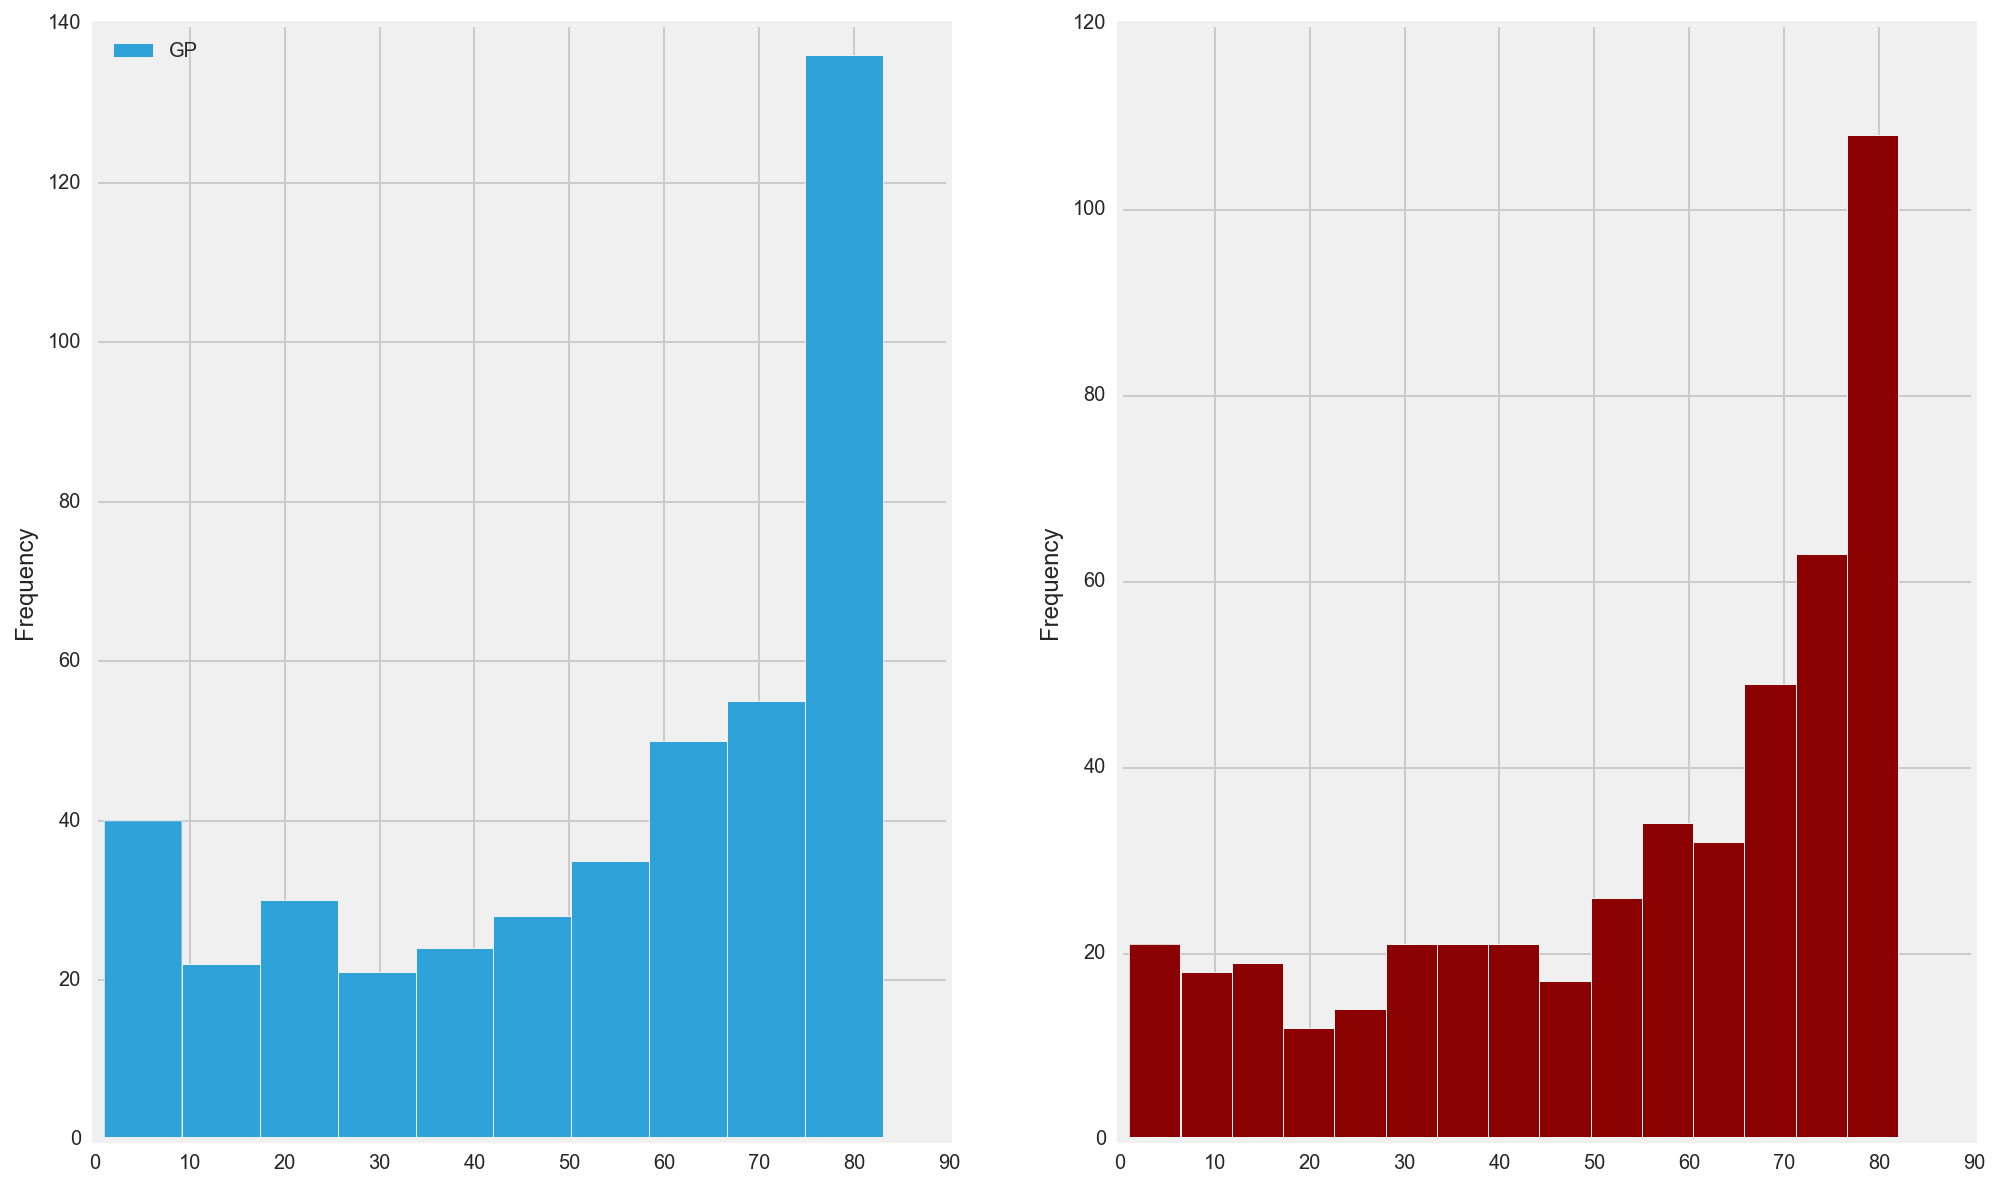

In [202]:
fig,ax = plt.subplots(1,2,figsize=(15,10))

ax[0] = df_1996[['GP']].plot(kind='hist', ax=ax[0])
ax[1] = df_2015['GP'].plot(kind='hist', ax=ax[1], bins=15,color='darkred')
plt.show()

In [156]:
df_2015 = pd.read_csv('../datasets/player_avgs/player_average_2015-16.csv')
df_1996 = pd.read_csv('../datasets/player_avgs/player_average_1996-97.csv')

In [162]:
df_15_96 = pd.DataFrame(df_2015.GP, df_1996.GP).reset_index()
df_15_96.head()

ValueError: cannot insert GP, already exists

In [148]:
df_15_96.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 2 columns):
gp    440 non-null int64
GP    440 non-null int64
dtypes: int64(2)
memory usage: 6.9 KB


In [120]:
mask = df_1996['min'] > 30.
df_1996[mask]['gp'].mean()

73.14754098360656

In [141]:
f = '/Users/amos/Desktop/DSI-SF-2-amoskim25/copy_capstone/datasets/player_avgs/player_average_%s.csv'
years_gp_dict = {}
for z in zipped:
    df = pd.read_csv(f % z)
    mask = df['MIN'] > 35.
    gp_mean = df[mask]['GP'].mean()
    years_gp_dict[z] = gp_mean
    
years_gp_dict

{'1996-97': 73.28395061728395,
 '1997-98': 71.05555555555556,
 '1998-99': 46.5531914893617,
 '1999-00': 77.06521739130434,
 '2000-01': 74.35185185185185,
 '2001-02': 73.98214285714286,
 '2002-03': 74.45833333333333,
 '2003-04': 71.71666666666667,
 '2004-05': 72.13725490196079,
 '2005-06': 75.39655172413794,
 '2006-07': 70.47457627118644,
 '2007-08': 74.30357142857143,
 '2008-09': 72.42307692307692,
 '2009-10': 73.18181818181819,
 '2010-11': 74.32432432432432,
 '2011-12': 59.629629629629626,
 '2012-13': 73.03225806451613,
 '2013-14': 74.1,
 '2014-15': 66.0,
 '2015-16': 71.42857142857143}

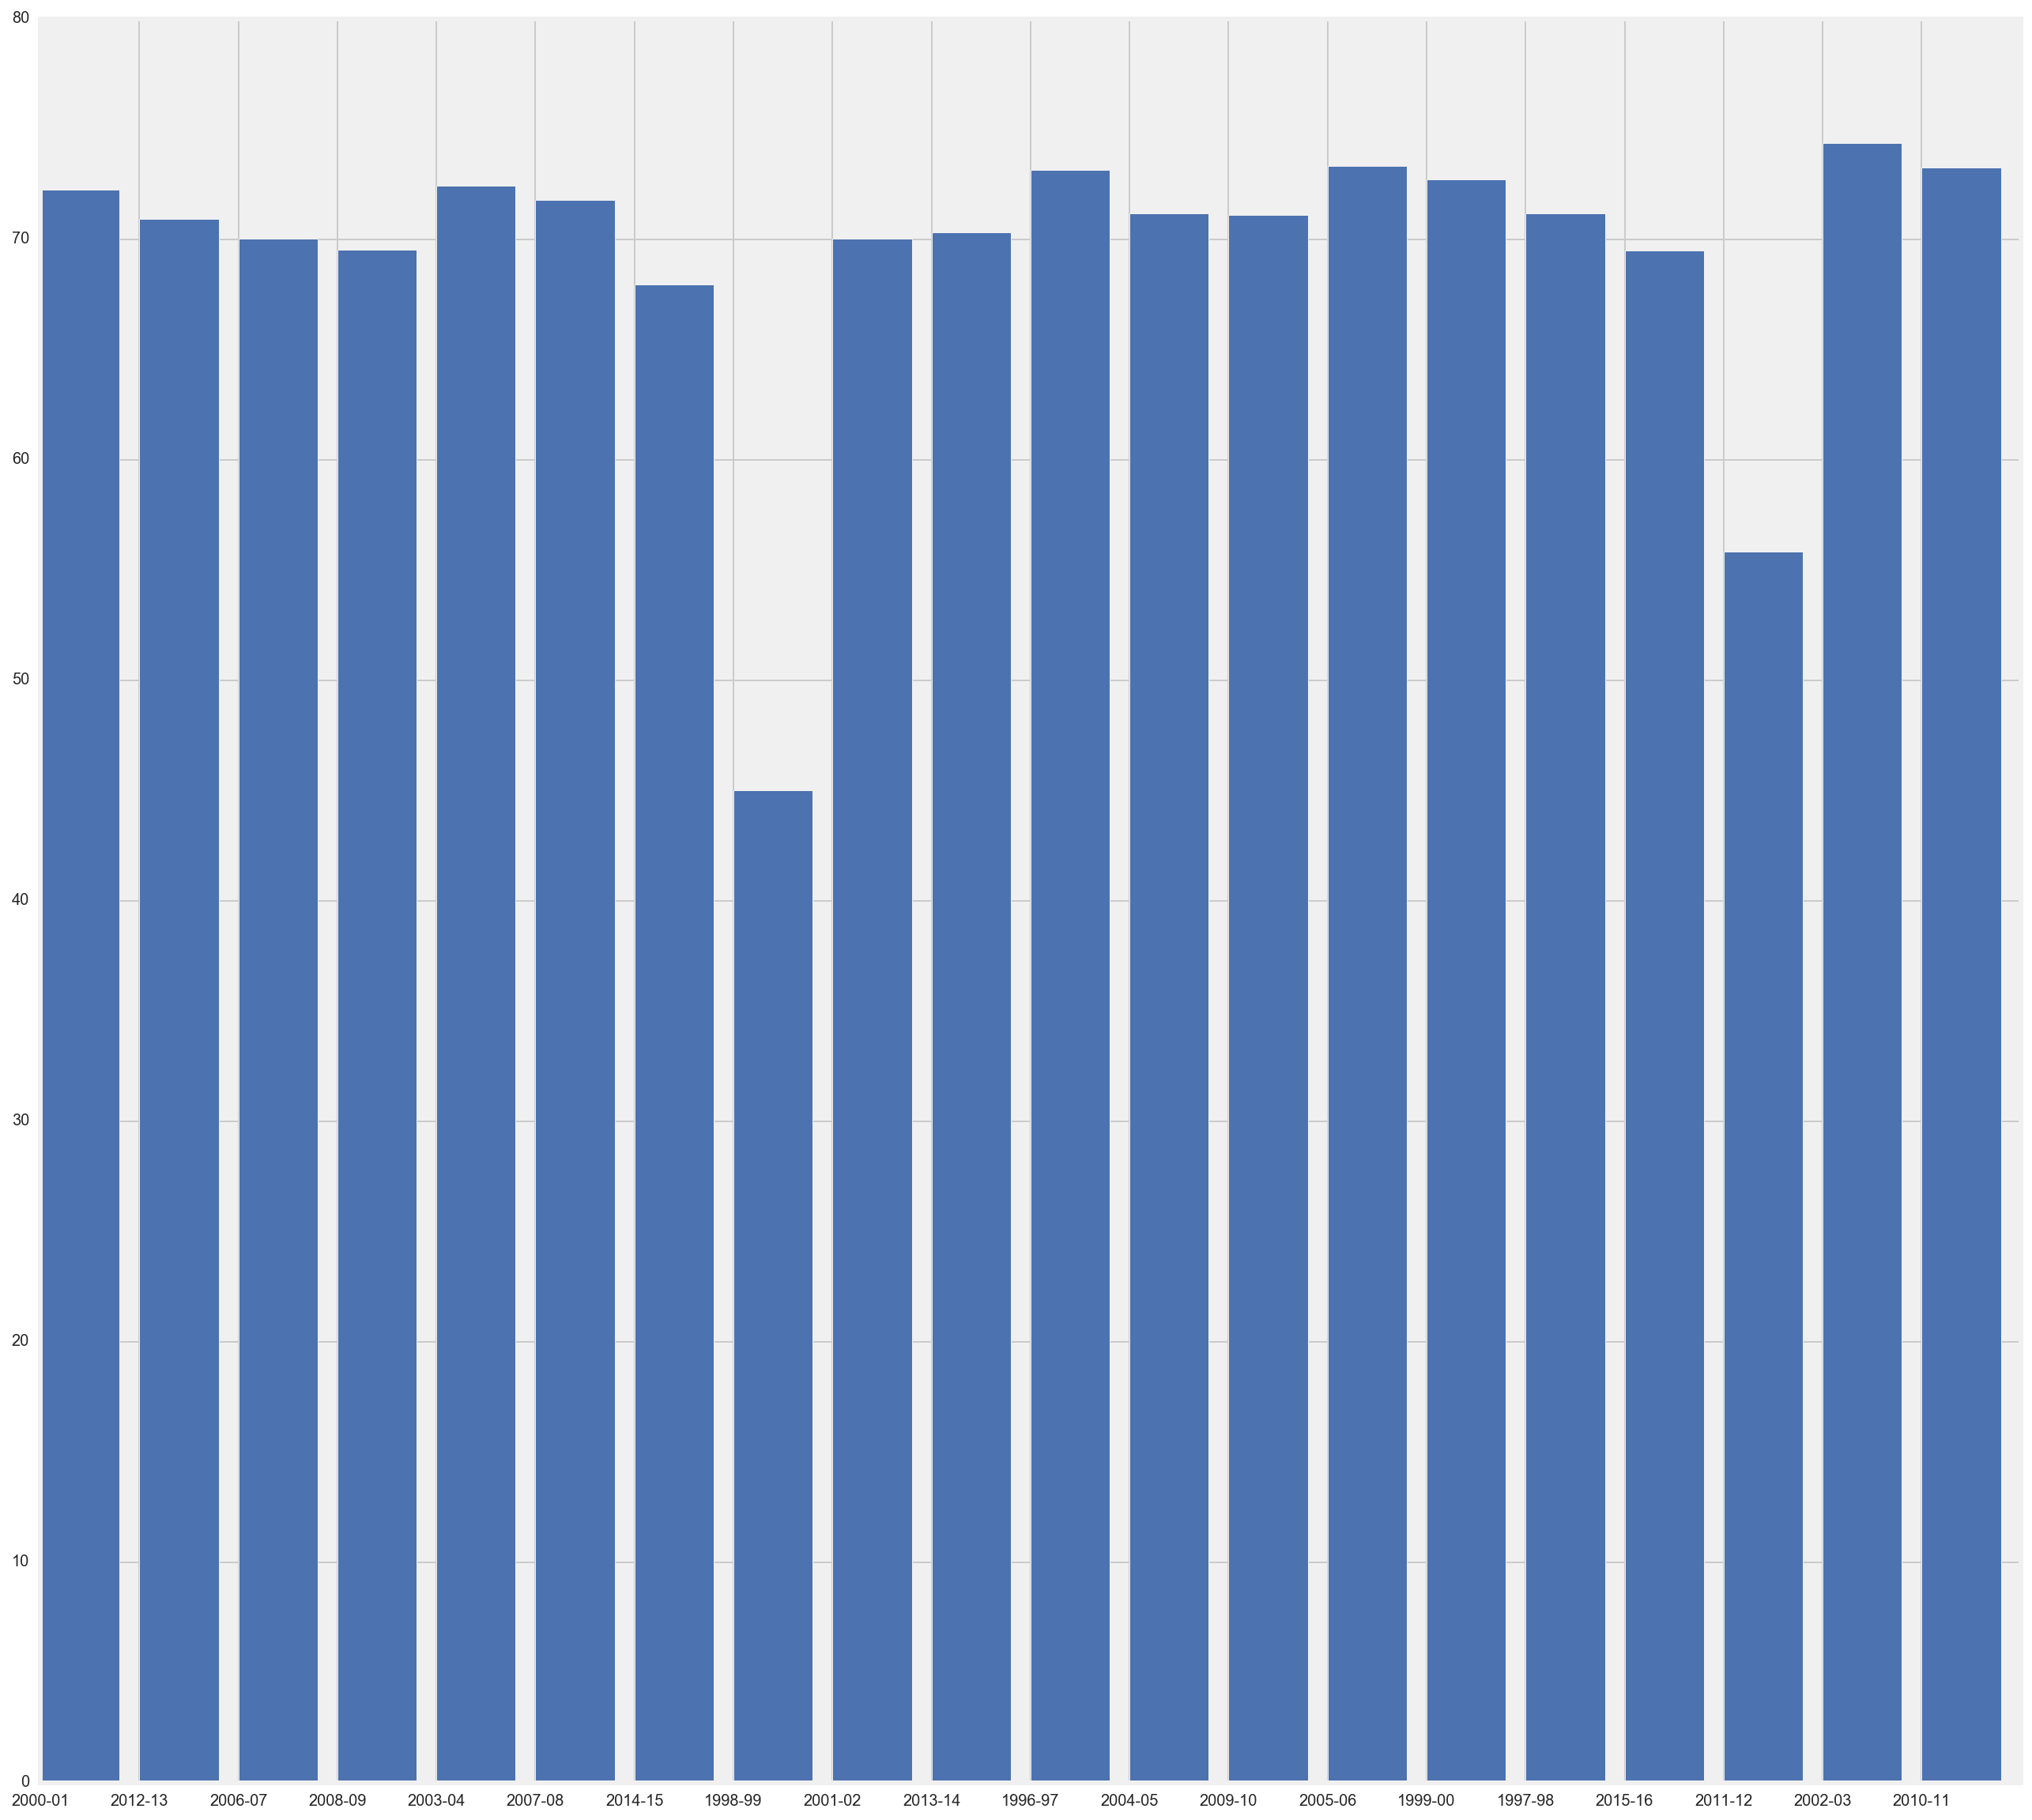

In [140]:
# df = pd.DataFrame(years_gp_dict, index=[0])
# df.plot(x=df.iloc[0,:],kind='hist')

# plt.bar(years_gp_dict.keys(), years_gp_dict.values(), align='center')
# plt.show()
# keys = []
# values = []
# for k,v in years_gp_dict.items():
#     keys.append(k)
#     values.append(v)
# fig, ax = plt.subplots(figsize=(20,20))
# plt.bar(range(len(years_gp_dict)), values)
# plt.xticks(range(len(years_gp_dict)), keys)

# plt.show()

In [182]:
lockout_years = ['1998-99', '2011-12']
for y in lockout_years:
    del years_gp_dict[y]

years_gp_dict
# need to delete lockout years
# 1998-99, 2011-12

{'1996-97': 73.28395061728395,
 '1997-98': 71.05555555555556,
 '1999-00': 77.06521739130434,
 '2000-01': 74.35185185185185,
 '2001-02': 73.98214285714286,
 '2002-03': 74.45833333333333,
 '2003-04': 71.71666666666667,
 '2004-05': 72.13725490196079,
 '2005-06': 75.39655172413794,
 '2006-07': 70.47457627118644,
 '2007-08': 74.30357142857143,
 '2008-09': 72.42307692307692,
 '2009-10': 73.18181818181819,
 '2010-11': 74.32432432432432,
 '2012-13': 73.03225806451613,
 '2013-14': 74.1,
 '2014-15': 66.0,
 '2015-16': 71.42857142857143}

In [183]:

tmp = pd.DataFrame(years_gp_dict, index=[0]).T


In [184]:
tmp.index = tmp.index.map(lambda x: x[:4])

In [185]:
tmp.index = pd.to_datetime(tmp.index)

In [187]:
tmp

,0
1996-01-01,73.283951
1997-01-01,71.055556
1999-01-01,77.065217
2000-01-01,74.351852
2001-01-01,73.982143
2002-01-01,74.458333
2003-01-01,71.716667
2004-01-01,72.137255
2005-01-01,75.396552
2006-01-01,70.474576


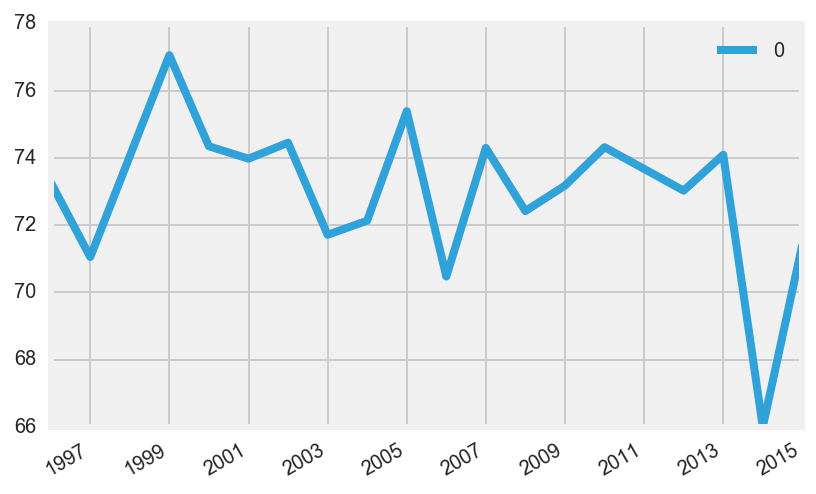

In [186]:
tmp.plot()

# There seems to be a decline in games played or injuries/suspensions increased from 1996-2015
- lets see a box plot of data 
- note: players in each year that average minutes greater than 35.

 

# Below: plotting without restrictions in minutes and creating a box plot

In [190]:
non_lockout_yrs = [z for z in zipped if z not in lockout_years]
non_lockout_yrs

['1996-97',
 '1997-98',
 '1999-00',
 '2000-01',
 '2001-02',
 '2002-03',
 '2003-04',
 '2004-05',
 '2005-06',
 '2006-07',
 '2007-08',
 '2008-09',
 '2009-10',
 '2010-11',
 '2012-13',
 '2013-14',
 '2014-15',
 '2015-16']

In [ ]:
# So I need to 
f = '/Users/amos/Desktop/DSI-SF-2-amoskim25/copy_capstone/datasets/player_avgs/player_average_%s.csv'
games_played_per_year = pd.DataFrame()
for z in non_lockout_yrs:
    df = pd.read_csv(f % z)
    gp = df['GP']
    years_gp_dict[z] = gp_mean
    
years_gp_dict